In [126]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

In [127]:
sys.setrecursionlimit(10**6)  

---
## Sorting Algos

In [128]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [129]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [130]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)


In [131]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

In [132]:
def median_of_three(arr, low, mid, high):
    a = arr[low]
    b = arr[mid]
    c = arr[high]
    if a > b:
        if a < c:
            return low
        elif b > c:
            return mid
        else:
            return high
    else:
        if a > c:
            return low
        elif b < c:
            return mid
        else:
            return high

def modified_partition(arr, low, high):
    mid = (low + high) // 2
    median_index = median_of_three(arr, low, mid, high)
    arr[median_index], arr[high] = arr[high], arr[median_index]
    return partition(arr, low, high)

def modified_quick_sort(arr, low, high):
    if high - low + 1 <= 10:
        insertion_sort(arr[low:high + 1])
    else:
        if low < high:
            pi = modified_partition(arr, low, high)
            modified_quick_sort(arr, low, pi - 1)
            modified_quick_sort(arr, pi + 1, high)


---


In [133]:
def generate_random_array(size):
    return [random.randint(0, 100000) for _ in range(size)]

In [134]:
def measure_time(sort_function, arr, runs=5):
    total_time = 0
    for _ in range(runs):
        arr_copy = arr.copy()
        start_time = time.time()
        sort_function(arr_copy)
        total_time += time.time() - start_time
    return total_time / runs

---

In [135]:
def run_experiments(input_sizes):
    algorithms = [
        ("Insertion Sort", insertion_sort),
        ("Merge Sort", merge_sort),
        ("Heap Sort", heap_sort),
        ("Quick Sort", lambda arr: quick_sort(arr, 0, len(arr) - 1)),
        ("Modified Quick Sort", lambda arr: modified_quick_sort(arr, 0, len(arr) - 1))
    ]
    results_random = {name: [] for name, _ in algorithms}
    results_sorted = {name: [] for name, _ in algorithms}
    results_reversed = {name: [] for name, _ in algorithms}

    for size in input_sizes:
        random_arr = generate_random_array(size)
        sorted_arr = sorted(random_arr)
        reversed_arr = sorted_arr[::-1]

        for name, sort_function in algorithms:
            time_taken_random = measure_time(sort_function, random_arr)
            time_taken_sorted = measure_time(sort_function, sorted_arr)
            time_taken_reversed = measure_time(sort_function, reversed_arr)

            results_random[name].append(time_taken_random)
            results_sorted[name].append(time_taken_sorted)
            results_reversed[name].append(time_taken_reversed)
            print(f"Size: {size}, Algorithm: {name}, "
                  f"Random: {time_taken_random:.5f} s, "
                  f"Sorted: {time_taken_sorted:.5f} s, "
                  f"Reversed: {time_taken_reversed:.5f} s")

    return results_random, results_sorted, results_reversed

In [136]:
def plot_results(input_sizes, results, title):
    plt.figure(figsize=(12, 8))
    for name, times in results.items():
        plt.plot(input_sizes, times, label=name)
    plt.xlabel("Input Size")
    plt.ylabel("Time (seconds)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

---

Size: 1000, Algorithm: Insertion Sort, Random: 0.03271 s, Sorted: 0.00000 s, Reversed: 0.04292 s
Size: 1000, Algorithm: Merge Sort, Random: 0.00200 s, Sorted: 0.00160 s, Reversed: 0.00180 s
Size: 1000, Algorithm: Heap Sort, Random: 0.00371 s, Sorted: 0.00340 s, Reversed: 0.00200 s
Size: 1000, Algorithm: Quick Sort, Random: 0.00120 s, Sorted: 0.04854 s, Reversed: 0.03744 s
Size: 1000, Algorithm: Modified Quick Sort, Random: 0.00121 s, Sorted: 0.00081 s, Reversed: 0.00140 s
Size: 5000, Algorithm: Insertion Sort, Random: 0.68625 s, Sorted: 0.00060 s, Reversed: 1.58539 s
Size: 5000, Algorithm: Merge Sort, Random: 0.01779 s, Sorted: 0.01184 s, Reversed: 0.01128 s
Size: 5000, Algorithm: Heap Sort, Random: 0.01893 s, Sorted: 0.01947 s, Reversed: 0.01602 s
Size: 5000, Algorithm: Quick Sort, Random: 0.00673 s, Sorted: 1.59251 s, Reversed: 1.16417 s
Size: 5000, Algorithm: Modified Quick Sort, Random: 0.00951 s, Sorted: 0.00643 s, Reversed: 0.01460 s
Size: 10000, Algorithm: Insertion Sort, Random

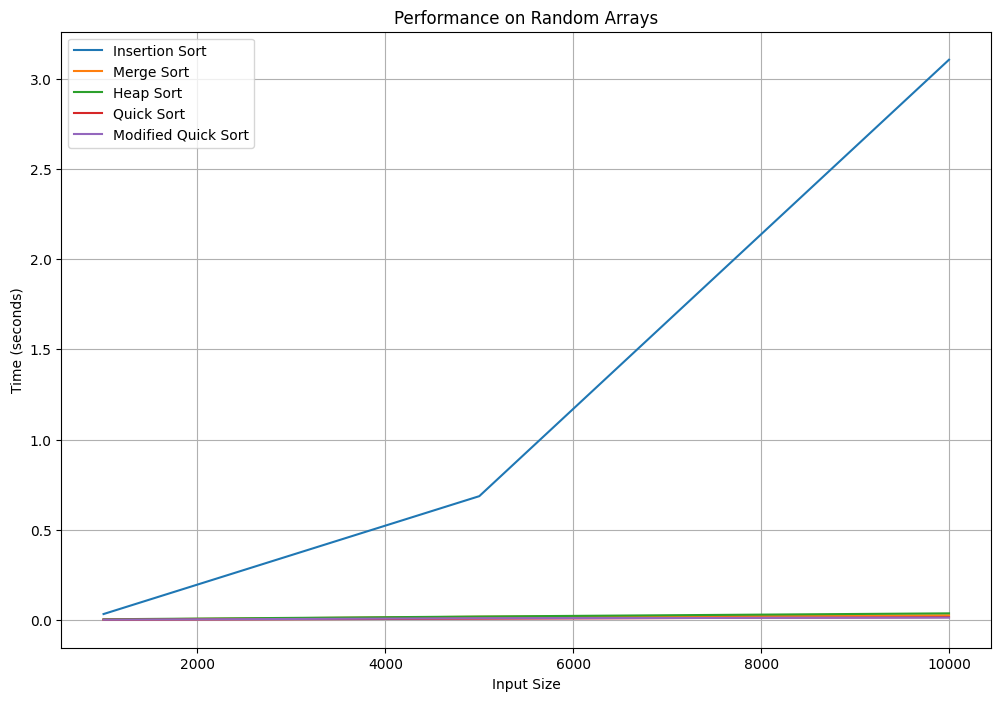

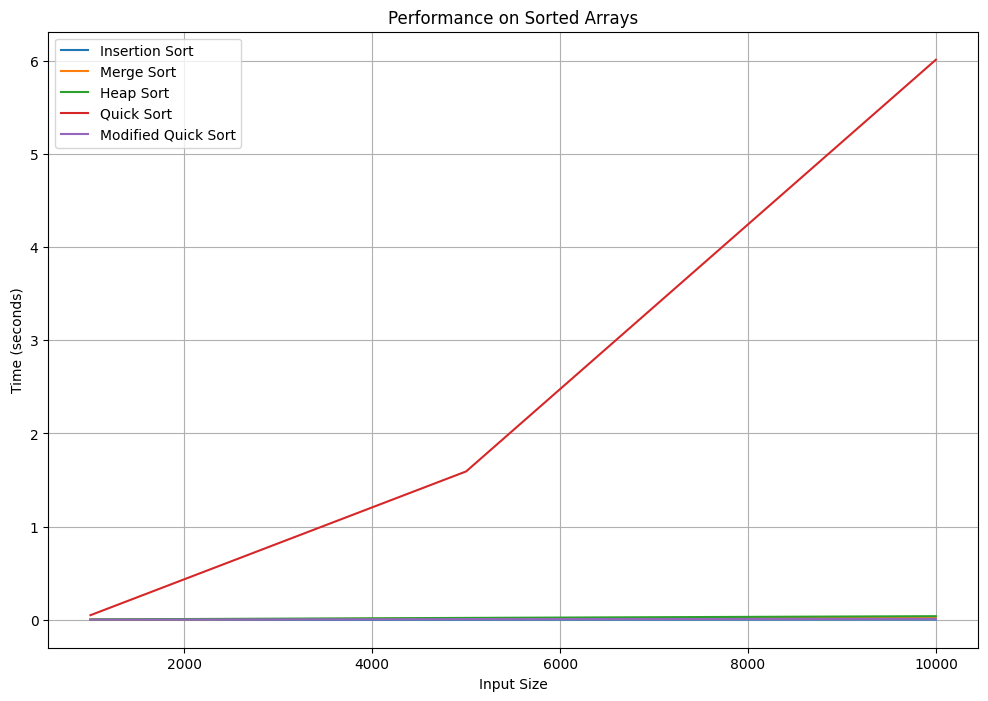

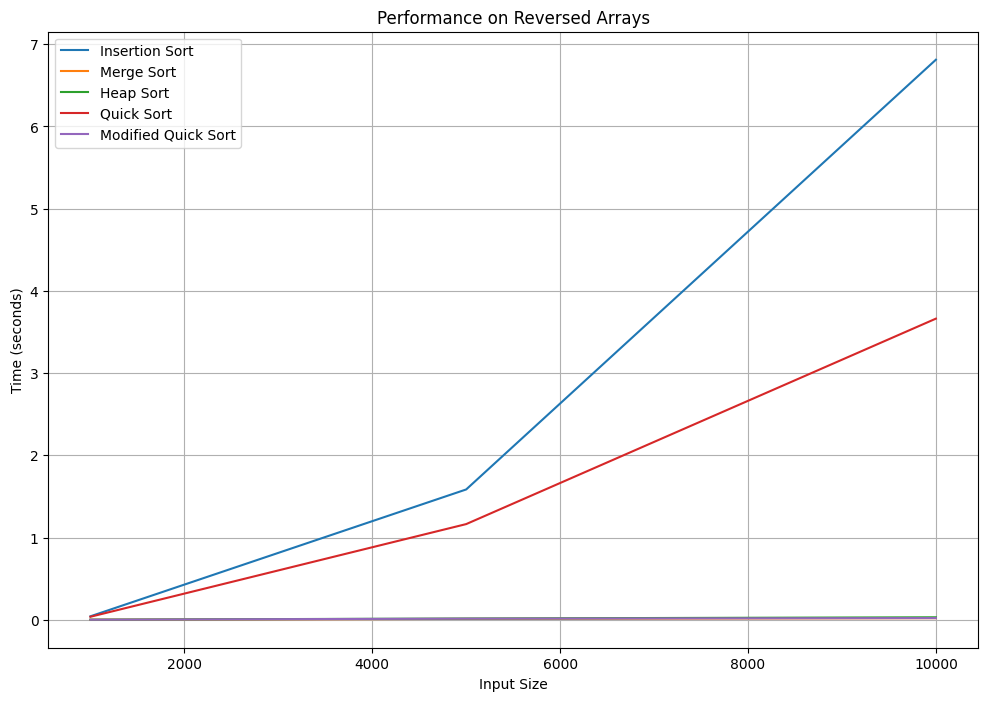

In [137]:
def main():
    input_sizes = [int(x) for x in input("Enter the input sizes (comma-separated): ").split(",")]
    results_random, results_sorted, results_reversed = run_experiments(input_sizes)

    plot_results(input_sizes, results_random, "Random Arrays")
    plot_results(input_sizes, results_sorted, "Sorted Arrays")
    plot_results(input_sizes, results_reversed, "Reversed Arrays")

if __name__ == "__main__":
    main()